# Text Classification using ML

##### Spam ham mail classification

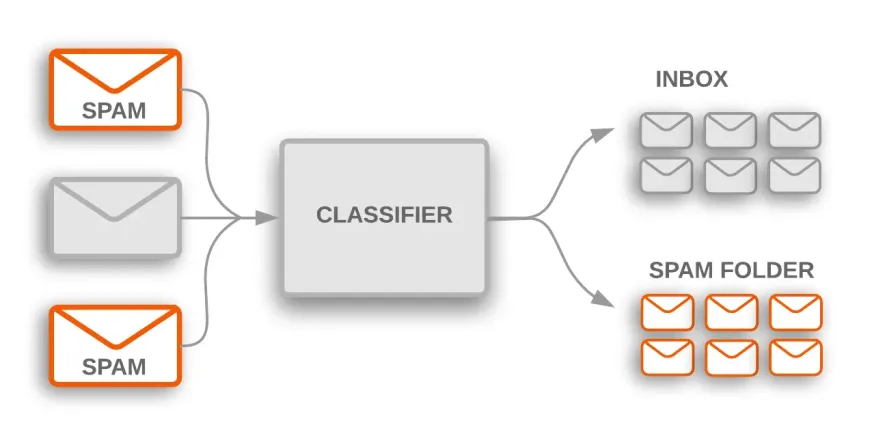

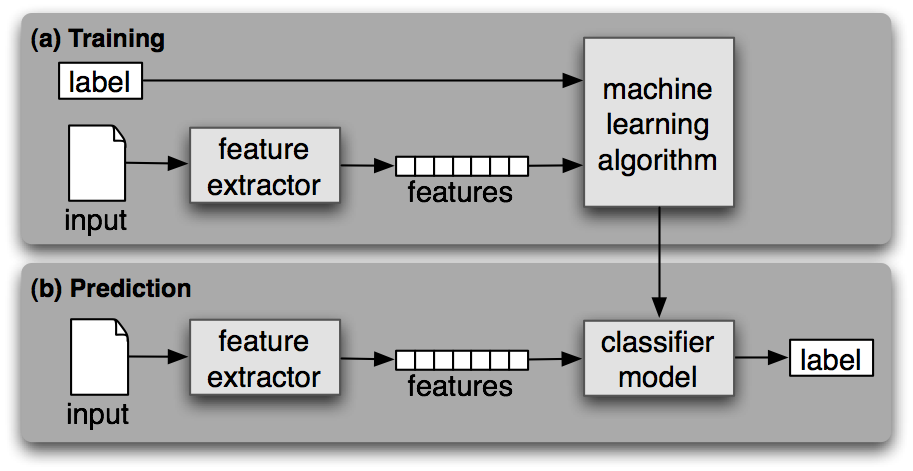

#### Text Processing Pipeline

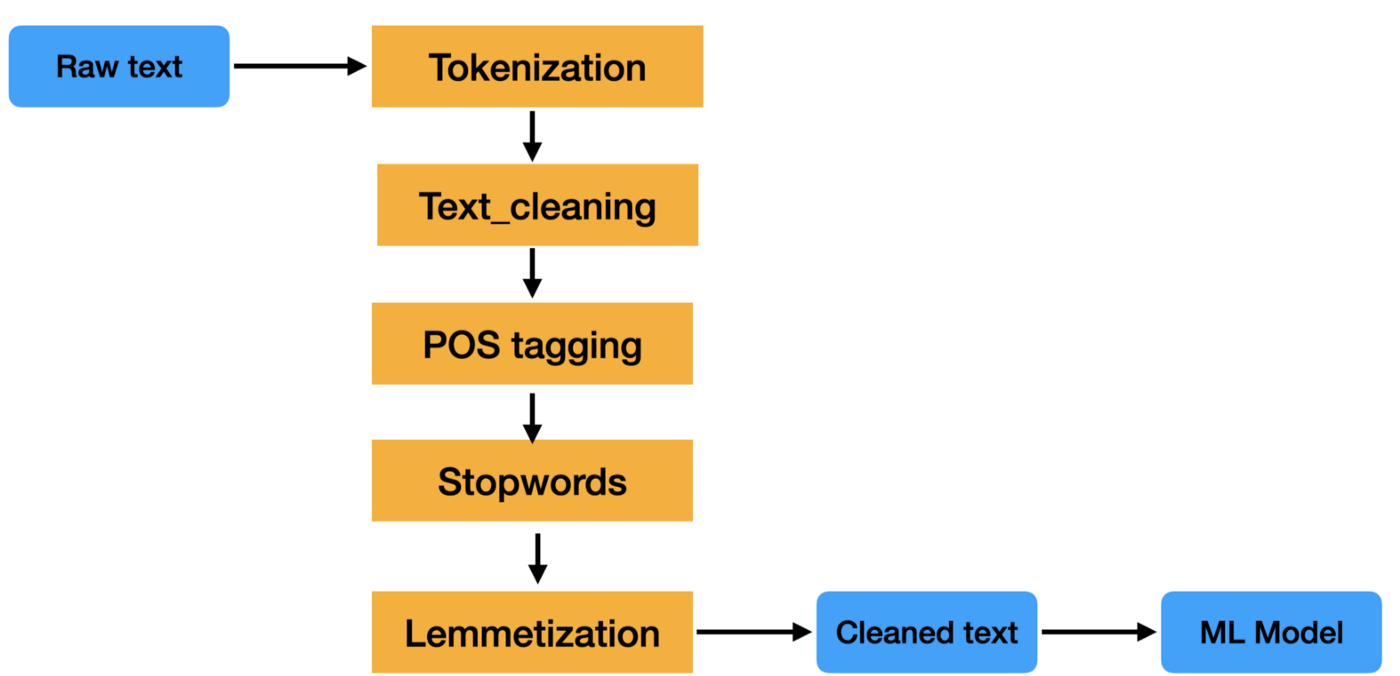

### Let's begin

In [64]:
# Importing libraries

import re

import pandas as pd

import numpy as np

import nltk

# nltk.download('all')

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score

from keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.layers import Embedding, Dense, Flatten, Dropout, BatchNormalization

from tensorflow.keras import Sequential

#### Dataset Loading

In [6]:
# reading data

data = pd.read_csv('https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv', encoding='latin-1')

data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
# drop unnecessary columns and rename cols

data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

data.columns = ['label', 'text']

data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### EDA

In [8]:
# check missing values

data.isna().sum()

label    0
text     0
dtype: int64

In [9]:
# check data shape

data.shape

(5572, 2)

<Axes: xlabel='label'>

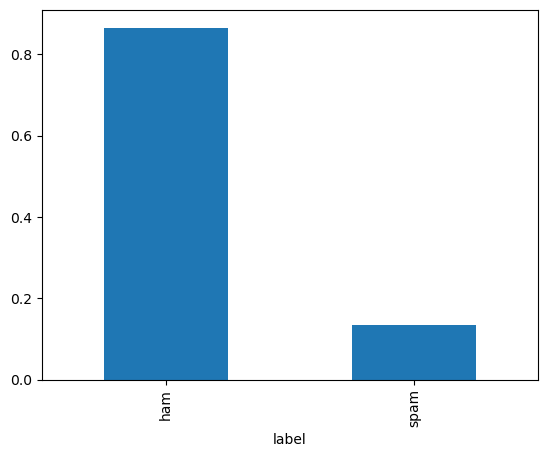

In [10]:
# check target balance

data['label'].value_counts(normalize = True).plot.bar()

#### Text Preprocessing pipeline

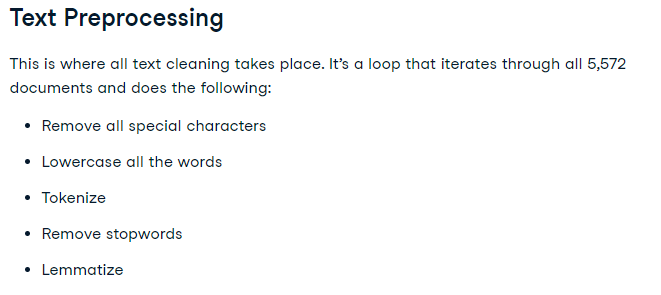

In [11]:
# text preprocessing

def preprocess_pipeline(text_data):
    # create a list text

    lemmatizer = WordNetLemmatizer()

    if str(type(text_data)) != "<class 'str'>":
        text = list(text_data)
        
        # preprocessing loop

        corpus = []

        for i in range(len(text)):

            r = re.sub('[^a-zA-Z]', ' ', text[i])

            r = r.lower()

            r = r.split()

            r = [word for word in r if word not in stopwords.words('english')]

            r = [lemmatizer.lemmatize(word) for word in r]

            r = ' '.join(r)

            corpus.append(r)

        return corpus
    
    else:
        
        r = re.sub('[^a-zA-Z]', ' ', text_data)

        r = r.lower()

        r = r.split()

        r = [word for word in r if word not in stopwords.words('english')]

        r = [lemmatizer.lemmatize(word) for word in r]

        r = ' '.join(r)

        return r

In [12]:
#assign corpus to data['text']
preprocessed_text = preprocess_pipeline(data['text'])

print(preprocessed_text)

['go jurong point crazy available bugis n great world la e buffet cine got amore wat', 'ok lar joking wif u oni', 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply', 'u dun say early hor u c already say', 'nah think go usf life around though', 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv', 'even brother like speak treat like aid patent', 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune', 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour', 'mobile month u r entitled update latest colour mobile camera free call mobile update co free', 'gonna home soon want talk stuff anymore tonight k cried enough today', 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info', 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw', 'searching

In [13]:
data['text'] = preprocessed_text

data.head()

,label,text
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [14]:
data['label'] = np.where(data['label']=='ham', 0, 1)
data.head()

,label,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah think go usf life around though


#### Train-Test split

In [15]:
# Create Feature and Label sets

X = data['text']

y = data['label']


# train test split (66% train - 33% test)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print('Training Data :', X_train.shape)

print('Testing Data : ', X_test.shape)

Training Data : (3900,)
Testing Data :  (1672,)


#### Feature Extraction

In [16]:
# Train Bag of Words model

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X_train_cv = cv.fit_transform(X_train)

print(X_train_cv.shape)

# transform X_test using CV

X_test_cv = cv.transform(X_test)

print(X_test_cv.shape)

(3900, 5839)
(1672, 5839)


In [17]:
# TfidfVectorizer model

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_vect = vectorizer.fit_transform(X_train)

print(X_train_vect.shape)

# transform X_test using CV

X_test_vect = vectorizer.transform(X_test)

print(X_test_vect.shape)

(3900, 5839)
(1672, 5839)


In [18]:
# Installing gensim

# %pip install gensim

In [19]:
# Train Word2Vec model

from gensim.models import Word2Vec,KeyedVectors

sentences = [sentence.split() for sentence in X_train]
w2v_model = Word2Vec(sentences, vector_size=300, window=10, min_count=5, workers=4)

In [21]:
# Generating embeddings

def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(300)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

X_train_embed = np.array([vectorize(sentence) for sentence in X_train])
X_test_embed = np.array([vectorize(sentence) for sentence in X_test])

##### Pre-trained embeddings

In [29]:
embed_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin',binary=True)

In [32]:
embed_model['man'].shape

(300,)

In [33]:
embed_model.most_similar('cricket')

[('cricketing', 0.8372225761413574),
 ('cricketers', 0.8165745735168457),
 ('Test_cricket', 0.8094819188117981),
 ('Twenty##_cricket', 0.8068488240242004),
 ('Twenty##', 0.7624265551567078),
 ('Cricket', 0.75413978099823),
 ('cricketer', 0.7372578382492065),
 ('twenty##', 0.7316356897354126),
 ('T##_cricket', 0.7304614186286926),
 ('West_Indies_cricket', 0.6987985968589783)]

In [34]:
embed_model.similarity('man','woman')

0.76640123

In [35]:
embed_model.doesnt_match(['PHP','java','monkey'])

'monkey'

In [43]:
vec = embed_model['king'] - embed_model['man'] + embed_model['woman']
embed_model.most_similar([vec])

[('king', 0.8449392318725586),
 ('queen', 0.7300517559051514),
 ('monarch', 0.645466148853302),
 ('princess', 0.6156251430511475),
 ('crown_prince', 0.5818676352500916),
 ('prince', 0.5777117609977722),
 ('kings', 0.5613663792610168),
 ('sultan', 0.5376775860786438),
 ('Queen_Consort', 0.5344247817993164),
 ('queens', 0.5289887189865112)]

In [41]:
# Generating embeddings

def vectorize(sentence):
    words = sentence.split()
    words_vecs = [embed_model[word] for word in words if word in embed_model]
    if len(words_vecs) == 0:
        return np.zeros(300)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

X_train_embed_trained = np.array([vectorize(sentence) for sentence in X_train])
X_test_embed_trained = np.array([vectorize(sentence) for sentence in X_test])

#### Model Training and evaluation

#### Using CountVectorizer (BOW)

In [17]:
# Training Logistic Regression model

lr = LogisticRegression()

lr.fit(X_train_cv, y_train)

LogisticRegression()

In [18]:
# generate probabilities

probabilities = lr.predict_proba(X_test_cv)

print(probabilities)
print('-----------------\n')
print(probabilities[:,1])

[[0.97353665 0.02646335]
 [0.98424133 0.01575867]
 [0.66524241 0.33475759]
 ...
 [0.99260473 0.00739527]
 [0.98932422 0.01067578]
 [0.96624452 0.03375548]]
-----------------

[0.02646335 0.01575867 0.33475759 ... 0.00739527 0.01067578 0.03375548]


In [19]:
predictions = np.where(probabilities[:,1]>=0.5, 1, 0)

predictions

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
# generate predictions

# predictions = lr.predict(X_test_cv)

# predictions

### Confusion Matrix

In [21]:
# confusion matrix

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])

df

,ham,spam
ham,1452,1
spam,35,184


In [22]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.99
Recall: 0.84


#### Using TFIDF

In [23]:
# Training Logistic Regression model

lr = LogisticRegression()

lr.fit(X_train_vect, y_train)

LogisticRegression()

In [24]:
# generate probabilities

probabilities = lr.predict_proba(X_test_vect)

print(probabilities)
print('-----------------\n')
print(probabilities[:,1])

[[0.9265393  0.0734607 ]
 [0.93244387 0.06755613]
 [0.65056084 0.34943916]
 ...
 [0.94979445 0.05020555]
 [0.94736812 0.05263188]
 [0.91043184 0.08956816]]
-----------------

[0.0734607  0.06755613 0.34943916 ... 0.05020555 0.05263188 0.08956816]


In [25]:
predictions = np.where(probabilities[:,1]>=0.5, 1, 0)

predictions

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
# generate predictions

# predictions = lr.predict(X_test_cv)

# predictions

### Confusion Matrix

In [27]:
# confusion matrix

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])

df

,ham,spam
ham,1447,6
spam,64,155


In [28]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.96
Recall: 0.71


#### Using Embeddings

In [29]:
# Training Logistic Regression model

lr = LogisticRegression()

lr.fit(X_train_embed, y_train)

LogisticRegression()

In [30]:
# generate probabilities

probabilities = lr.predict_proba(X_test_embed)

print(probabilities)
print('-----------------\n')
print(probabilities[:,1])

[[0.94769494 0.05230506]
 [0.87287748 0.12712252]
 [0.81874645 0.18125355]
 ...
 [0.88167097 0.11832903]
 [0.93594435 0.06405565]
 [0.90818266 0.09181734]]
-----------------

[0.05230506 0.12712252 0.18125355 ... 0.11832903 0.06405565 0.09181734]


In [31]:
predictions = np.where(probabilities[:,1]>=0.2, 1, 0)

predictions

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
# generate predictions

# predictions = lr.predict(X_test_cv)

# predictions

### Confusion Matrix

In [33]:
# confusion matrix

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])

df

,ham,spam
ham,1298,155
spam,196,23


In [34]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.13
Recall: 0.11


### Using Pre-trained embeddings

In [44]:
# Training Logistic Regression model

lr = LogisticRegression()

lr.fit(X_train_embed_trained, y_train)

LogisticRegression()

In [45]:
# generate probabilities

probabilities = lr.predict_proba(X_test_embed_trained)

print(probabilities)
print('-----------------\n')
print(probabilities[:,1])

[[0.98668712 0.01331288]
 [0.86055212 0.13944788]
 [0.68958068 0.31041932]
 ...
 [0.98269154 0.01730846]
 [0.99830733 0.00169267]
 [0.79760685 0.20239315]]
-----------------

[0.01331288 0.13944788 0.31041932 ... 0.01730846 0.00169267 0.20239315]


In [58]:
predictions = np.where(probabilities[:,1]>=0.9, 1, 0)

predictions

array([0, 0, 0, ..., 0, 0, 0])

In [59]:
# generate predictions

# predictions = lr.predict(X_test_cv)

# predictions

### Confusion Matrix

In [60]:
# confusion matrix

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])

df

,ham,spam
ham,1444,9
spam,169,50


In [61]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.85
Recall: 0.23


## Using ANN

In [36]:
model = Sequential()
model.add(Dense(64,input_shape = (5839,), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(4, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                373760    
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

#### Using BOW

In [38]:
model.fit(X_train_cv.toarray(), y_train, epochs=20, batch_size=4, validation_split=0.2)

Epoch 1/20
780/780 [==============================] - 10s 9ms/step - loss: 0.5233 - accuracy: 0.7590 - val_loss: 0.4310 - val_accuracy: 0.8949
Epoch 2/20
780/780 [==============================] - 7s 9ms/step - loss: 0.3437 - accuracy: 0.8663 - val_loss: 0.2348 - val_accuracy: 0.9423
Epoch 3/20
780/780 [==============================] - 7s 9ms/step - loss: 0.3039 - accuracy: 0.8740 - val_loss: 0.2244 - val_accuracy: 0.9487
Epoch 4/20
780/780 [==============================] - 7s 9ms/step - loss: 0.2598 - accuracy: 0.8968 - val_loss: 0.1571 - val_accuracy: 0.9577
Epoch 5/20
780/780 [==============================] - 7s 9ms/step - loss: 0.2329 - accuracy: 0.9071 - val_loss: 0.1211 - val_accuracy: 0.9641
Epoch 6/20
780/780 [==============================] - 7s 8ms/step - loss: 0.2257 - accuracy: 0.9112 - val_loss: 0.1325 - val_accuracy: 0.9603
Epoch 7/20
780/780 [==============================] - 7s 9ms/step - loss: 0.2035 - accuracy: 0.9256 - val_loss: 0.1250 - val_accuracy: 0.9628
Epoch

In [39]:
probabilities = model.predict(X_test_cv.toarray())

probabilities

53/53 [==============================] - 1s 4ms/step


array([[2.4958956e-03],
       [1.3253645e-03],
       [5.8462358e-01],
       ...,
       [1.8204626e-04],
       [1.3392769e-04],
       [3.5947317e-04]], dtype=float32)

In [40]:
predictions = np.where(probabilities>=0.5, 1, 0)

predictions

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [41]:
# confusion matrix

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])

df

,ham,spam
ham,1451,2
spam,38,181


In [42]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.99
Recall: 0.83


#### Using TFIDF

In [43]:
model = Sequential()
model.add(Dense(64,input_shape = (5839,), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(4, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                373760    
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_5 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 32)               

In [44]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [45]:
model.fit(X_train_vect.toarray(), y_train, epochs=20, batch_size=4, validation_split=0.2)

Epoch 1/20


780/780 [==============================] - 12s 10ms/step - loss: 0.5225 - accuracy: 0.7622 - val_loss: 0.2569 - val_accuracy: 0.9282
Epoch 2/20
780/780 [==============================] - 7s 8ms/step - loss: 0.3371 - accuracy: 0.8696 - val_loss: 0.1998 - val_accuracy: 0.9410
Epoch 3/20
780/780 [==============================] - 7s 9ms/step - loss: 0.2845 - accuracy: 0.8872 - val_loss: 0.1576 - val_accuracy: 0.9526
Epoch 4/20
780/780 [==============================] - 6s 8ms/step - loss: 0.2506 - accuracy: 0.9026 - val_loss: 0.1521 - val_accuracy: 0.9551
Epoch 5/20
780/780 [==============================] - 7s 8ms/step - loss: 0.2350 - accuracy: 0.9125 - val_loss: 0.1259 - val_accuracy: 0.9641
Epoch 6/20
780/780 [==============================] - 7s 9ms/step - loss: 0.2046 - accuracy: 0.9263 - val_loss: 0.1269 - val_accuracy: 0.9705
Epoch 7/20
780/780 [==============================] - 7s 8ms/step - loss: 0.1913 - accuracy: 0.9333 - val_loss: 0.1204 - val_accuracy: 0.9641
Epoch 8/20
780/

In [46]:
probabilities = model.predict(X_test_vect.toarray())

probabilities

53/53 [==============================] - 0s 2ms/step


array([[2.8174141e-04],
       [7.9809397e-04],
       [9.3240947e-01],
       ...,
       [2.6151785e-05],
       [2.2666247e-04],
       [3.0716360e-04]], dtype=float32)

In [47]:
predictions = np.where(probabilities>=0.6, 1, 0)

predictions

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [48]:
# confusion matrix

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])

df

,ham,spam
ham,1450,3
spam,34,185


In [49]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.98
Recall: 0.84


#### Using Embeddings

In [50]:
model = Sequential()
model.add(Dense(128,input_shape = (300,), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               64128     
                                                                 
 batch_normalization_8 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_9 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 64)               

In [51]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [52]:
model.fit(X_train_embed, y_train, epochs=10, batch_size=4, validation_split=0.2)

Epoch 1/10
780/780 [==============================] - 6s 4ms/step - loss: 0.5071 - accuracy: 0.7881 - val_loss: 0.4175 - val_accuracy: 0.8179
Epoch 2/10
780/780 [==============================] - 3s 4ms/step - loss: 0.4166 - accuracy: 0.8606 - val_loss: 0.3853 - val_accuracy: 0.8654
Epoch 3/10
780/780 [==============================] - 3s 4ms/step - loss: 0.4049 - accuracy: 0.8625 - val_loss: 0.3816 - val_accuracy: 0.8654
Epoch 4/10
780/780 [==============================] - 3s 4ms/step - loss: 0.4060 - accuracy: 0.8635 - val_loss: 0.3722 - val_accuracy: 0.8654
Epoch 5/10
780/780 [==============================] - 3s 4ms/step - loss: 0.4011 - accuracy: 0.8644 - val_loss: 0.3772 - val_accuracy: 0.8654
Epoch 6/10
780/780 [==============================] - 3s 4ms/step - loss: 0.3889 - accuracy: 0.8644 - val_loss: 0.4139 - val_accuracy: 0.8654
Epoch 7/10
780/780 [==============================] - 3s 4ms/step - loss: 0.3843 - accuracy: 0.8644 - val_loss: 0.3737 - val_accuracy: 0.8654
Epoch 

In [53]:
probabilities = model.predict(X_test_embed)

probabilities

53/53 [==============================] - 0s 2ms/step


array([[0.01466737],
       [0.12562783],
       [0.13529697],
       ...,
       [0.12392448],
       [0.02531285],
       [0.05627136]], dtype=float32)

In [54]:
predictions = np.where(probabilities>=0.4, 1, 0)

predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [55]:
# confusion matrix

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])

df

,ham,spam
ham,1453,0
spam,219,0


In [56]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.00
Recall: 0.00


c:\Users\puroshotam\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Using pre-trained embeddings

In [65]:
model = Sequential()
model.add(Dense(128,input_shape = (300,), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               38528     
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [66]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [67]:
model.fit(X_train_embed_trained, y_train, epochs=10, batch_size=4, validation_split=0.2)

Epoch 1/10
780/780 [==============================] - 10s 5ms/step - loss: 0.4725 - accuracy: 0.7833 - val_loss: 0.2710 - val_accuracy: 0.8987
Epoch 2/10
780/780 [==============================] - 3s 4ms/step - loss: 0.3024 - accuracy: 0.8667 - val_loss: 0.2319 - val_accuracy: 0.9231
Epoch 3/10
780/780 [==============================] - 3s 3ms/step - loss: 0.2875 - accuracy: 0.8756 - val_loss: 0.1940 - val_accuracy: 0.9256
Epoch 4/10
780/780 [==============================] - 3s 4ms/step - loss: 0.2703 - accuracy: 0.8837 - val_loss: 0.1880 - val_accuracy: 0.9308
Epoch 5/10
780/780 [==============================] - 4s 4ms/step - loss: 0.2595 - accuracy: 0.8955 - val_loss: 0.1679 - val_accuracy: 0.9397
Epoch 6/10
780/780 [==============================] - 4s 5ms/step - loss: 0.2525 - accuracy: 0.8990 - val_loss: 0.1491 - val_accuracy: 0.9474
Epoch 7/10
780/780 [==============================] - 3s 4ms/step - loss: 0.2441 - accuracy: 0.9022 - val_loss: 0.1599 - val_accuracy: 0.9487
Epoch

In [68]:
probabilities = model.predict(X_test_embed_trained)

probabilities

53/53 [==============================] - 0s 2ms/step


array([[0.07392373],
       [0.48924002],
       [0.3844271 ],
       ...,
       [0.05397662],
       [0.00867531],
       [0.15214476]], dtype=float32)

In [75]:
predictions = np.where(probabilities>=0.8, 1, 0)

predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [76]:
# confusion matrix

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])

df

,ham,spam
ham,1444,9
spam,107,112


In [77]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 0.93
Recall: 0.51


#### Using Embeddings in Keras library

In [57]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [58]:
vocab_size = len(tokenizer.word_index) + 1
vocab_size

5861

In [59]:
# Pad the sequences to a fixed length
max_length = 100
X_train = pad_sequences(X_train, maxlen=max_length, padding='post')
X_test = pad_sequences(X_test, maxlen=max_length, padding='post')

In [60]:
# Define the ANN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_length))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          586100    
                                                                 
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense_15 (Dense)            (None, 128)               1280128   
                                                                 
 batch_normalization_12 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                      

In [61]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
98/98 [==============================] - 9s 43ms/step - loss: 0.6727 - accuracy: 0.6455 - val_loss: 0.6187 - val_accuracy: 0.8705
Epoch 2/10
98/98 [==============================] - 3s 35ms/step - loss: 0.4237 - accuracy: 0.8449 - val_loss: 0.3427 - val_accuracy: 0.8654
Epoch 3/10
98/98 [==============================] - 4s 36ms/step - loss: 0.2393 - accuracy: 0.9458 - val_loss: 0.3330 - val_accuracy: 0.8705
Epoch 4/10
98/98 [==============================] - 4s 38ms/step - loss: 0.1387 - accuracy: 0.9753 - val_loss: 0.1613 - val_accuracy: 0.9513
Epoch 5/10
98/98 [==============================] - 4s 36ms/step - loss: 0.0990 - accuracy: 0.9811 - val_loss: 0.1977 - val_accuracy: 0.9577
Epoch 6/10
98/98 [==============================] - 4s 36ms/step - loss: 0.0750 - accuracy: 0.9859 - val_loss: 0.1407 - val_accuracy: 0.9577
Epoch 7/10
98/98 [==============================] - 4s 38ms/step - loss: 0.0666 - accuracy: 0.9840 - val_loss: 0.1209 - val_accuracy: 0.9692
Epoch 8/10
98

In [62]:
probabilities = model.predict(X_test)

probabilities

53/53 [==============================] - 1s 4ms/step


array([[0.00819096],
       [0.00759139],
       [0.13241023],
       ...,
       [0.00857709],
       [0.00525851],
       [0.01211411]], dtype=float32)

In [63]:
predictions = np.where(probabilities>=0.9, 1, 0)

predictions

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [64]:
# confusion matrix

df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])

df

,ham,spam
ham,1453,0
spam,60,159


In [65]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Precision: 1.00
Recall: 0.73
